<a href="https://colab.research.google.com/github/flowonthegoliv/ENVS666_2024/blob/main/reading_geotiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install rasterio
import matplotlib.pyplot as plt
import rasterio
import pandas as pd
import requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 63.3 MB/s eta 0:00:00


Width: 150, Height: 150
Number of bands: 1
Coordinate Reference System (CRS): EPSG:4326
Transform: | 0.00, 0.00,-3.03|
| 0.00,-0.00, 53.48|
| 0.00, 0.00, 1.00|


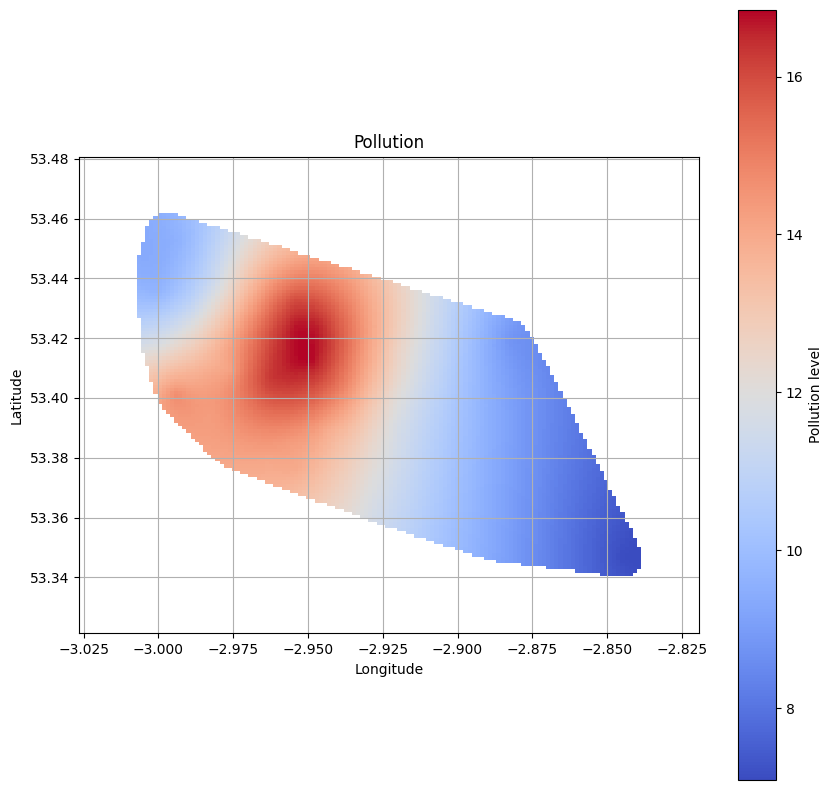

In [8]:
pollutant = 'PM2p5' #PM10p0, PM1p0, TEMPERATURE, HUMIDITY
granularity = 'HOURLY' # MONTHY, DAILY, HOURLY
date='2024-02-09 12:00:00'

file_path = requests.get('http://jonnyhigham.co.uk/AIRTEST/get_geotiff.php?pollutant='+pollutant+'&granularity='+granularity+'&date='+date).json()
with rasterio.open(file_path) as src:
    # Print basic metadata about the GeoTIFF file
    print(f"Width: {src.width}, Height: {src.height}")
    print(f"Number of bands: {src.count}")
    print(f"Coordinate Reference System (CRS): {src.crs}")
    print(f"Transform: {src.transform}")

    # Read the first band
    data = src.read(1, masked=True)  # Use masked=True to mask out no data values

    # Get bounds
    bounds = src.bounds
    extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    im = ax.imshow(data, cmap='coolwarm', extent=extent)
    ax.set_title('Pollution')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Adding colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label('Pollution level')

    # Show grid and set aspect
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')

    plt.show()